In [255]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from word2number import w2n

In [254]:
pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for word2number, since package 'wheel' is not installed.
  Running setup.py install for word2number: started
  Running setup.py install for word2number: finished with status 'done'

[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


I used the Normal Equation rather than the Gradient Decent

In [201]:
x1 = np.array([5, 5, 6, 7, 7])
x2 = np.array([20, 35, 38, 40, 46])
x3 = np.array([6, 6, 8, 8, 10])
y = np.array([12, 14, 16, 15, 20])


mean_x1 = x1.mean()
mean_x2 = x2.mean()
mean_x3 = x3.mean()
mean_y = y.mean()

dev_x1 = x1 - mean_x1
dev_x2 = x2 - mean_x2
dev_x3 = x3 - mean_x3
dev_y = y - mean_y
product_dev = dev_x1 * dev_x2 * dev_x3 * dev_y

sum_sq_x1 = np.sum(dev_x1**2)
sum_sq_x2 = np.sum(dev_x2**2)
sum_sq_x3 = np.sum(dev_x3**2)

b1 = np.sum(product_dev) / sum_sq_x1
b2 = np.sum(product_dev) / sum_sq_x2
b3 = np.sum(product_dev) / sum_sq_x3
b0 = mean_y - (b1*mean_x1) - (b2*mean_x2) - (b3 * mean_x3)
print(f"The Equation would be y = {b1} * x1 + {b2} * x2 + {b3} * x3 + {b0}")

The Equation would be y = 49.92 * x1 + 0.5299363057324841 * x2 + 17.82857142857143 * x3 + -438.5888626023658


<h2 style='color:red'> The values above are not optimized we need to make the coeafficinets as smaller as possible </h2>

To calculate the coeffiecnts using the normal equation
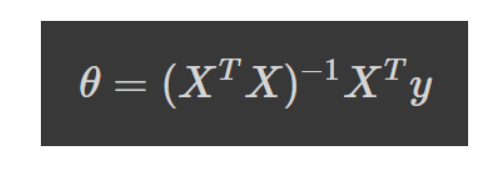

In [216]:

# Create the feature matrix X with intercept
X_with_intercept = np.column_stack((np.ones(len(x1)), x1, x2, x3))

# Calculate coefficients using the Normal Equation
coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

print("Coefficients:", coefficients)
print(f"The Equation would be y = {round(coefficients[1], 3)} * x1 + {round(coefficients[2], 3)} * x2 + {round(coefficients[3], 3)} * x3 + {round(coefficients[0], 3)}")

Coefficients: [ 6.064 -1.736  0.128  1.996]
The Equation would be y = -1.736 * x1 + 0.128 * x2 + 1.996 * x3 + 6.064


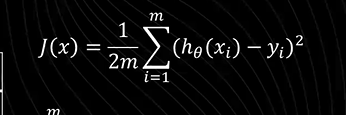

Let's calculate the cost 

In [229]:
df = pd.DataFrame(
    {
        'x1': x1,
        'x2': x2,
        'x3': x3,
        'y': y, 
        'h(x)': -1.736 * x1 + 0.128 * x2 + 1.996 * x3 + 6.064,
    }
)
df

,x1,x2,x3,y,h(x)
0,5,20,6,12,11.92
1,5,35,6,14,13.84
2,6,38,8,16,16.48
3,7,40,8,15,15.00
4,7,46,10,20,19.76


In [236]:
# Adding those Colums 
df['h(x) - y'] = df['h(x)'] - df['y']
df['(h(x) - y)^2'] = df['h(x) - y']**2
df

,x1,x2,x3,y,h(x),h(x) - y,(h(x) - y)^2
0,5,20,6,12,11.92,-0.08,0.0064
1,5,35,6,14,13.84,-0.16,0.0256
2,6,38,8,16,16.48,0.48,0.2304
3,7,40,8,15,15.00,0.00,0.0000
4,7,46,10,20,19.76,-0.24,0.0576


Calculate The Cost

In [247]:
cost = df['(h(x) - y)^2'].sum() / (2*5)
cost

0.03199999999999997

# Task 2

In exercise folder (same level as this notebook on github) there is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,


**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**


In [294]:
df = pd.read_csv('./Exercise/hiring.csv')
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


## Clean Data

In [295]:
# is there any nan or any duplicates 
print(df.duplicated().any())
print(df.isna().any())

False
experience                     True
test_score(out of 10)          True
interview_score(out of 10)    False
salary($)                     False
dtype: bool


In [297]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [302]:
df.fillna({
    'experience': 'zero',
    'test_score(out of 10)': 0
}, inplace=True)

In [303]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,0.0,7,72000
7,eleven,7.0,8,80000


In [304]:
print(df.isna().any())

experience                    False
test_score(out of 10)         False
interview_score(out of 10)    False
salary($)                     False
dtype: bool


In [305]:
df.experience = df.experience.apply(w2n.word_to_num)

In [306]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,0.0,7,72000
7,11,7.0,8,80000


### Seperating features from the outcome

In [307]:
X = df.drop('salary($)', axis=1)
y = df['salary($)']

In [309]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**

In [312]:
reg.predict([[2, 9, 6]])

c:\Users\WinDows\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52688.25222797])

In [313]:
reg.predict([[12, 10, 10]])

c:\Users\WinDows\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92940.63332619])